# 1. 损失函数

① Loss损失函数一方面计算实际输出和目标之间的差距。

② Loss损失函数另一方面为我们更新输出提供一定的依据。

# 2. L1loss损失函数

① L1loss数学公式如下图所示，例子如下下图所示。

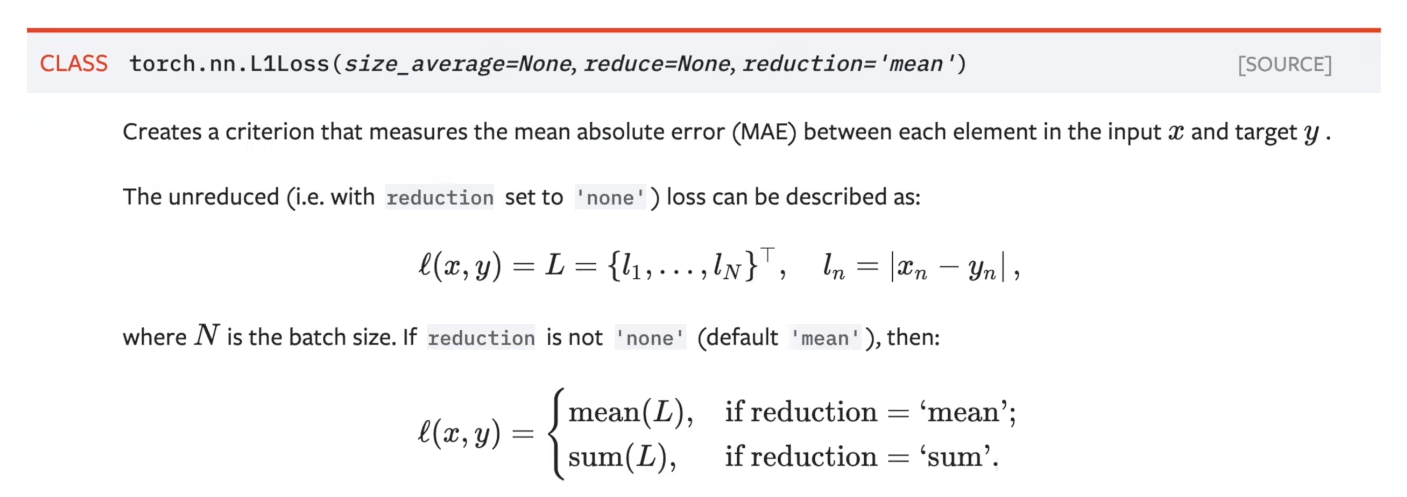

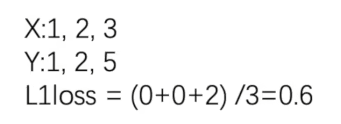

In [1]:
import torch
from torch.nn import L1Loss
inputs = torch.tensor([1,2,3],dtype=torch.float32)
targets = torch.tensor([1,2,5],dtype=torch.float32)
inputs = torch.reshape(inputs,(1,1,1,3))
targets = torch.reshape(targets,(1,1,1,3))
loss = L1Loss()  # 默认为 maen
result = loss(inputs,targets)
print(result)

tensor(0.6667)


In [2]:
import torch
from torch.nn import L1Loss
inputs = torch.tensor([1,2,3],dtype=torch.float32)
targets = torch.tensor([1,2,5],dtype=torch.float32)
inputs = torch.reshape(inputs,(1,1,1,3))
targets = torch.reshape(targets,(1,1,1,3))
loss = L1Loss(reduction='sum') # 修改为sum，三个值的差值，然后取和
result = loss(inputs,targets)
print(result)

tensor(2.)


# 3. MSE损失函数

① MSE损失函数数学公式如下图所示。

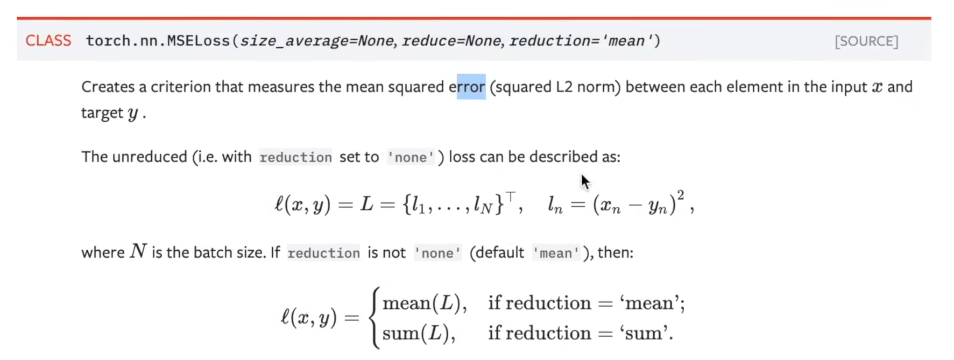

In [3]:
import torch
from torch.nn import L1Loss
from torch import nn
inputs = torch.tensor([1,2,3],dtype=torch.float32)
targets = torch.tensor([1,2,5],dtype=torch.float32)
inputs = torch.reshape(inputs,(1,1,1,3))
targets = torch.reshape(targets,(1,1,1,3))
loss_mse = nn.MSELoss()
result_mse = loss_mse(inputs,targets)
print(result_mse)

tensor(1.3333)


# 4. 交叉熵损失函数

① 交叉熵损失函数数学公式如下图所示。

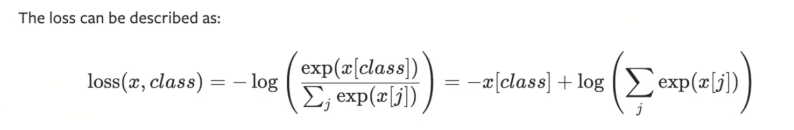

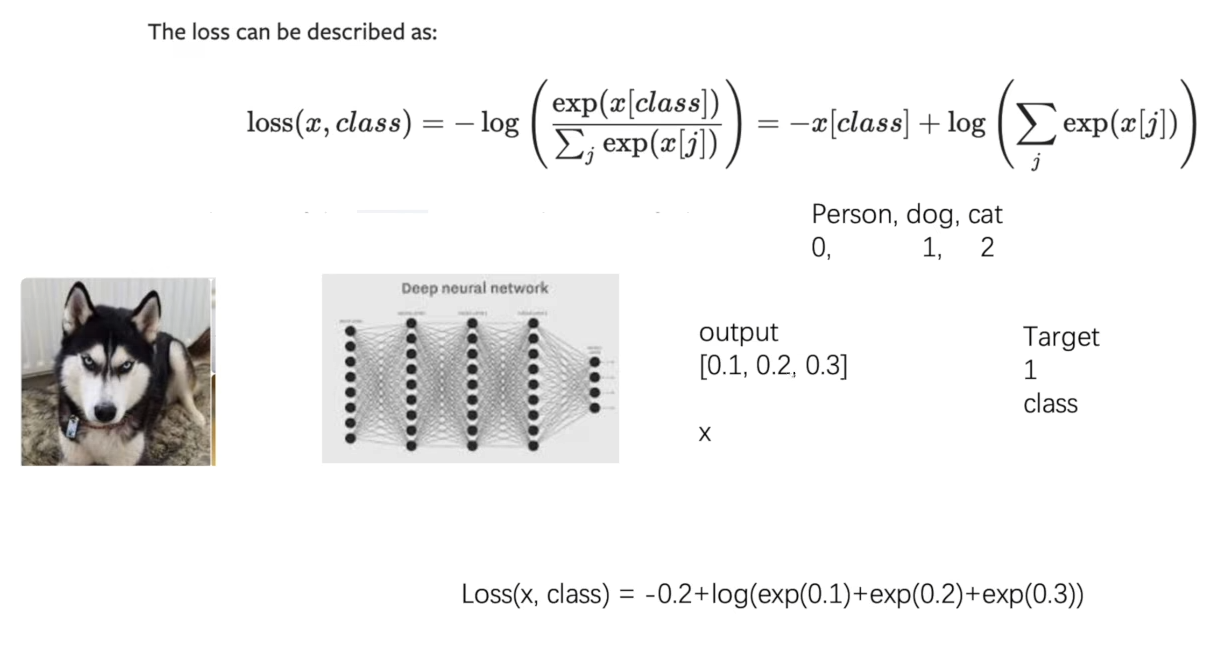

In [4]:
import torch
from torch.nn import L1Loss
from torch import nn

x = torch.tensor([0.1,0.2,0.3])
y = torch.tensor([1])
x = torch.reshape(x,(1,3)) # 1的 batch_size，有三类
loss_cross = nn.CrossEntropyLoss()
result_cross = loss_cross(x,y)
print(result_cross)

tensor(1.1019)


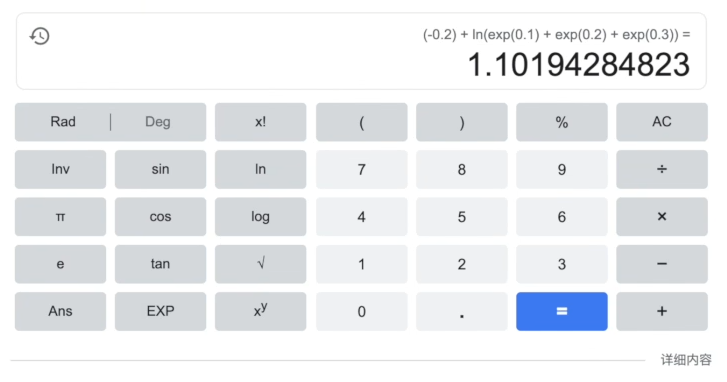

# 5. 搭建神经网络

In [5]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=1,drop_last=True)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    outputs = tudui(imgs)
    print(outputs)
    print(targets)

Files already downloaded and verified
tensor([[-0.1256, -0.1614, -0.0474, -0.0409,  0.0259, -0.1314, -0.1198, -0.0682,
         -0.1246, -0.1217]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1278, -0.1590, -0.0487, -0.0508,  0.0202, -0.1075, -0.0921, -0.0896,
         -0.1443, -0.1351]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1186, -0.1567, -0.0528, -0.0613,  0.0136, -0.1183, -0.0932, -0.0849,
         -0.1402, -0.1259]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1269, -0.1612, -0.0489, -0.0636,  0.0117, -0.1156, -0.0884, -0.0865,
         -0.1429, -0.1252]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1267, -0.1545, -0.0428, -0.0409,  0.0202, -0.1402, -0.1139, -0.0693,
         -0.1246, -0.1261]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1218, -0.1509, -0.0433, -0.0226,  0.0247, -0.1093, -0.1307, -0.0773,
         -0.1250, -0.1148]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1175, -0.1661, -0.0200, -0.0216,  0.0403, -0.1204, -0.0925, -0

tensor([[-0.1290, -0.1578, -0.0477, -0.0267,  0.0303, -0.1154, -0.1164, -0.0644,
         -0.1347, -0.1136]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1311, -0.1532, -0.0521, -0.0399,  0.0253, -0.1198, -0.1046, -0.0781,
         -0.1338, -0.1257]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1114, -0.1441, -0.0503, -0.0377,  0.0275, -0.0946, -0.1104, -0.0878,
         -0.1459, -0.1005]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1246, -0.1517, -0.0417, -0.0268,  0.0287, -0.1089, -0.1128, -0.1039,
         -0.1354, -0.1034]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1316, -0.1649, -0.0340, -0.0503,  0.0299, -0.1199, -0.0921, -0.0867,
         -0.1462, -0.1302]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1291, -0.1309, -0.0424, -0.0315,  0.0427, -0.1115, -0.0896, -0.0923,
         -0.1210, -0.1129]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1249, -0.1371, -0.0279, -0.0098,  0.0361, -0.1246, -0.1165, -0.0865,
         -0.1065, -0.1128]], gr

tensor([1])
tensor([[-0.1176, -0.1494, -0.0408, -0.0312,  0.0340, -0.1093, -0.0919, -0.0959,
         -0.1262, -0.1061]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1240, -0.1528, -0.0404, -0.0416,  0.0327, -0.1040, -0.0941, -0.0899,
         -0.1370, -0.1237]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1306, -0.1537, -0.0536, -0.0566,  0.0227, -0.1152, -0.0818, -0.0866,
         -0.1417, -0.1190]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1165, -0.1933, -0.0189, -0.0318,  0.0160, -0.1310, -0.1211, -0.0845,
         -0.1326, -0.1212]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1327, -0.1390, -0.0517, -0.0357,  0.0305, -0.1044, -0.1171, -0.0760,
         -0.1372, -0.0993]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1345, -0.1459, -0.0538, -0.0471,  0.0160, -0.1106, -0.1002, -0.0815,
         -0.1440, -0.1232]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1247, -0.1627, -0.0414, -0.0460,  0.0268, -0.1183, -0.1057, -0.0835,
         -0.1328, -

tensor([2])
tensor([[-0.1229, -0.1571, -0.0449, -0.0258,  0.0242, -0.1156, -0.1014, -0.0763,
         -0.1257, -0.1267]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1249, -0.1576, -0.0579, -0.0611,  0.0232, -0.1024, -0.0932, -0.0750,
         -0.1669, -0.1404]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1218, -0.1287, -0.0533, -0.0376,  0.0210, -0.1110, -0.0876, -0.0859,
         -0.1318, -0.1152]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1210, -0.1464, -0.0476, -0.0377,  0.0255, -0.1228, -0.1059, -0.0712,
         -0.1271, -0.1147]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1177, -0.1544, -0.0421, -0.0289,  0.0178, -0.1208, -0.1096, -0.0800,
         -0.1194, -0.1138]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1186, -0.1503, -0.0497, -0.0280,  0.0301, -0.1156, -0.1044, -0.0799,
         -0.1312, -0.1214]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1187, -0.1377, -0.0510, -0.0490,  0.0223, -0.1038, -0.0871, -0.0890,
         -0.1399, -

tensor([4])
tensor([[-0.1248, -0.1535, -0.0495, -0.0465,  0.0181, -0.1084, -0.1003, -0.0888,
         -0.1379, -0.1138]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1178, -0.1591, -0.0523, -0.0506,  0.0213, -0.1095, -0.0892, -0.0756,
         -0.1477, -0.1212]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1399, -0.1451, -0.0501, -0.0268,  0.0323, -0.1110, -0.0923, -0.0874,
         -0.1327, -0.1266]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1265, -0.1659, -0.0411, -0.0284,  0.0330, -0.1188, -0.1070, -0.0876,
         -0.1391, -0.1136]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1327, -0.1867, -0.0789, -0.0652,  0.0189, -0.1202, -0.1161, -0.0621,
         -0.1557, -0.1316]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1258, -0.1449, -0.0385, -0.0241,  0.0291, -0.1257, -0.1063, -0.0733,
         -0.1197, -0.1142]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1246, -0.1674, -0.0581, -0.0690,  0.0163, -0.1349, -0.1018, -0.0653,
         -0.1357, -

tensor([8])
tensor([[-0.1326, -0.1442, -0.0398, -0.0320,  0.0359, -0.1277, -0.1160, -0.0763,
         -0.1278, -0.1157]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1350, -0.1529, -0.0546, -0.0399,  0.0357, -0.1099, -0.1071, -0.0800,
         -0.1387, -0.1108]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1194, -0.1351, -0.0505, -0.0441,  0.0227, -0.0913, -0.0851, -0.1040,
         -0.1583, -0.1115]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1311, -0.1496, -0.0486, -0.0338,  0.0333, -0.1181, -0.0937, -0.0708,
         -0.1361, -0.1233]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1389, -0.1498, -0.0605, -0.0637,  0.0116, -0.1044, -0.0804, -0.0828,
         -0.1637, -0.1429]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1191, -0.1534, -0.0473, -0.0242,  0.0272, -0.1144, -0.1057, -0.0684,
         -0.1351, -0.1149]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1266, -0.1586, -0.0376, -0.0267,  0.0258, -0.1271, -0.1222, -0.0746,
         -0.1120, -

tensor([0])
tensor([[-0.1251, -0.1480, -0.0495, -0.0183,  0.0429, -0.1104, -0.1209, -0.0676,
         -0.1405, -0.1015]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1310, -0.1628, -0.0321, -0.0299,  0.0269, -0.1113, -0.1005, -0.0879,
         -0.1456, -0.1136]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1220, -0.1570, -0.0368, -0.0445,  0.0117, -0.1263, -0.1159, -0.0827,
         -0.1253, -0.1147]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1150, -0.1639, -0.0369, -0.0287,  0.0403, -0.1350, -0.1153, -0.0720,
         -0.1377, -0.1343]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1174, -0.1568, -0.0390, -0.0320,  0.0268, -0.1144, -0.1162, -0.0791,
         -0.1316, -0.1073]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1232, -0.1307, -0.0436, -0.0234,  0.0368, -0.1129, -0.1103, -0.0837,
         -0.1215, -0.1020]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1227, -0.1565, -0.0495, -0.0623,  0.0244, -0.1246, -0.0773, -0.0880,
         -0.1454, -

tensor([0])
tensor([[-0.1219, -0.1575, -0.0472, -0.0353,  0.0239, -0.1072, -0.1124, -0.0818,
         -0.1355, -0.1181]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1166, -0.1742, -0.0420, -0.0502,  0.0310, -0.1153, -0.1078, -0.0970,
         -0.1342, -0.1138]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1235, -0.1353, -0.0408, -0.0242,  0.0319, -0.0987, -0.1074, -0.0725,
         -0.1244, -0.1061]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1271, -0.1476, -0.0631, -0.0383,  0.0237, -0.1025, -0.1023, -0.0893,
         -0.1435, -0.1165]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1128, -0.1556, -0.0455, -0.0285,  0.0266, -0.1155, -0.1037, -0.0819,
         -0.1235, -0.1167]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1089, -0.1430, -0.0309, -0.0286,  0.0528, -0.1203, -0.0906, -0.0838,
         -0.1285, -0.1308]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1260, -0.1535, -0.0585, -0.0406,  0.0299, -0.1046, -0.1180, -0.0745,
         -0.1384, -

tensor([1])
tensor([[-0.1235, -0.1582, -0.0315, -0.0434,  0.0351, -0.1053, -0.1004, -0.1066,
         -0.1427, -0.1061]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1217, -0.1639, -0.0358, -0.0344,  0.0421, -0.1078, -0.1019, -0.1005,
         -0.1374, -0.0973]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1252, -0.1586, -0.0373, -0.0345,  0.0308, -0.1147, -0.1057, -0.0924,
         -0.1267, -0.1342]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1257, -0.1718, -0.0546, -0.0203,  0.0395, -0.1019, -0.1156, -0.0832,
         -0.1404, -0.1026]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1298, -0.1466, -0.0508, -0.0444,  0.0087, -0.1231, -0.1036, -0.0723,
         -0.1352, -0.1254]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1291, -0.1545, -0.0512, -0.0334,  0.0237, -0.1067, -0.0994, -0.0849,
         -0.1384, -0.1314]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1426, -0.1709, -0.0434, -0.0345,  0.0291, -0.1192, -0.1119, -0.0797,
         -0.1371, -

tensor([4])
tensor([[-0.1299, -0.1525, -0.0400, -0.0403,  0.0303, -0.1172, -0.1108, -0.0906,
         -0.1243, -0.1117]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1282, -0.1461, -0.0459, -0.0484,  0.0222, -0.1258, -0.0930, -0.0801,
         -0.1303, -0.1242]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1307, -0.1532, -0.0452, -0.0342,  0.0364, -0.1099, -0.1071, -0.0753,
         -0.1461, -0.1150]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1281, -0.1525, -0.0470, -0.0368,  0.0308, -0.1132, -0.1085, -0.0919,
         -0.1343, -0.1200]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1216, -0.1454, -0.0354, -0.0218,  0.0250, -0.1183, -0.1097, -0.0888,
         -0.1182, -0.1213]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1227, -0.1567, -0.0433, -0.0270,  0.0300, -0.1041, -0.1129, -0.0859,
         -0.1363, -0.1098]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1301, -0.1398, -0.0523, -0.0369,  0.0409, -0.1110, -0.1130, -0.0654,
         -0.1401, -

tensor([5])
tensor([[-0.1249, -0.1773, -0.0554, -0.0816,  0.0230, -0.1202, -0.0830, -0.0987,
         -0.1663, -0.1250]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1311, -0.1507, -0.0432, -0.0443,  0.0429, -0.1081, -0.0994, -0.0864,
         -0.1527, -0.1040]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1150, -0.1547, -0.0274, -0.0372,  0.0461, -0.0979, -0.0984, -0.0764,
         -0.1373, -0.1092]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1334, -0.1569, -0.0526, -0.0541,  0.0245, -0.1144, -0.1020, -0.0792,
         -0.1429, -0.1123]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1247, -0.1521, -0.0435, -0.0554,  0.0225, -0.1229, -0.0865, -0.0914,
         -0.1438, -0.1352]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1183, -0.1507, -0.0290, -0.0462,  0.0257, -0.1092, -0.1080, -0.0981,
         -0.1404, -0.1117]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1311, -0.1451, -0.0502, -0.0291,  0.0266, -0.1195, -0.1108, -0.0703,
         -0.1290, -

tensor([[-0.1290, -0.1707, -0.0510, -0.0368,  0.0225, -0.1150, -0.1240, -0.0829,
         -0.1437, -0.1145]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1217, -0.1415, -0.0320, -0.0150,  0.0350, -0.1204, -0.1052, -0.0884,
         -0.1291, -0.1247]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1299, -0.1875, -0.0330, -0.0475,  0.0137, -0.1500, -0.1167, -0.0782,
         -0.1152, -0.1456]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1277, -0.1751, -0.0443, -0.0516,  0.0311, -0.1228, -0.0911, -0.0978,
         -0.1521, -0.1281]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1228, -0.1396, -0.0488, -0.0242,  0.0316, -0.1071, -0.1135, -0.0777,
         -0.1296, -0.1056]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1138, -0.1488, -0.0404, -0.0435,  0.0295, -0.1166, -0.0894, -0.0896,
         -0.1364, -0.1341]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1217, -0.1586, -0.0445, -0.0437,  0.0281, -0.1129, -0.0899, -0.0895,
         -0.1392, -0.1200]], gr

tensor([9])
tensor([[-0.1310, -0.1814, -0.0430, -0.0417,  0.0432, -0.1133, -0.1096, -0.0809,
         -0.1493, -0.1170]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1245, -0.1674, -0.0528, -0.0393,  0.0266, -0.1372, -0.1224, -0.0726,
         -0.1576, -0.1359]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1187, -0.1548, -0.0538, -0.0352,  0.0352, -0.1102, -0.0801, -0.0743,
         -0.1529, -0.1251]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1279, -0.1477, -0.0517, -0.0409,  0.0299, -0.1188, -0.1015, -0.0669,
         -0.1251, -0.1259]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1346, -0.1542, -0.0544, -0.0528,  0.0204, -0.1212, -0.0909, -0.0734,
         -0.1424, -0.1305]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1128, -0.1525, -0.0394, -0.0297,  0.0227, -0.1366, -0.1188, -0.0715,
         -0.1273, -0.1122]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1195, -0.1458, -0.0463, -0.0225,  0.0255, -0.1113, -0.1209, -0.0735,
         -0.1232, -

tensor([4])
tensor([[-0.1253, -0.1381, -0.0363, -0.0423,  0.0452, -0.1119, -0.1091, -0.1006,
         -0.1504, -0.1072]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1290, -0.1508, -0.0481, -0.0562,  0.0116, -0.1312, -0.0946, -0.0714,
         -0.1346, -0.1291]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1037, -0.1336, -0.0467, -0.0332,  0.0305, -0.0858, -0.1022, -0.1027,
         -0.1368, -0.0861]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1307, -0.1662, -0.0451, -0.0458,  0.0292, -0.1367, -0.1078, -0.0656,
         -0.1257, -0.1273]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1185, -0.1448, -0.0464, -0.0287,  0.0385, -0.1105, -0.0973, -0.0834,
         -0.1312, -0.1128]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1214, -0.1553, -0.0339, -0.0350,  0.0243, -0.1212, -0.1178, -0.0784,
         -0.1243, -0.1274]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1283, -0.1539, -0.0412, -0.0383,  0.0434, -0.1148, -0.1170, -0.0792,
         -0.1285, -

tensor([8])
tensor([[-0.1251, -0.1621, -0.0401, -0.0386,  0.0136, -0.1167, -0.1032, -0.0795,
         -0.1374, -0.1351]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1277, -0.1499, -0.0505, -0.0400,  0.0320, -0.1171, -0.1073, -0.0737,
         -0.1456, -0.1163]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1256, -0.1512, -0.0550, -0.0478,  0.0357, -0.1064, -0.0759, -0.0994,
         -0.1597, -0.1243]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1193, -0.1509, -0.0414, -0.0264,  0.0414, -0.0991, -0.0978, -0.1029,
         -0.1329, -0.1209]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1195, -0.1369, -0.0329, -0.0281,  0.0424, -0.1098, -0.0923, -0.0869,
         -0.1182, -0.1096]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1205, -0.1406, -0.0394, -0.0289,  0.0273, -0.1213, -0.1093, -0.0716,
         -0.1191, -0.1157]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1370, -0.1538, -0.0547, -0.0576,  0.0137, -0.1178, -0.0972, -0.0828,
         -0.1425, -

tensor([4])
tensor([[-0.1273, -0.1506, -0.0375, -0.0375,  0.0247, -0.1279, -0.1102, -0.0774,
         -0.1207, -0.1231]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1329, -0.1657, -0.0611, -0.0603,  0.0221, -0.1290, -0.0940, -0.0750,
         -0.1433, -0.1365]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1178, -0.1568, -0.0500, -0.0397,  0.0248, -0.1217, -0.1034, -0.0808,
         -0.1419, -0.1271]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1262, -0.1639, -0.0406, -0.0272,  0.0408, -0.1264, -0.1206, -0.0653,
         -0.1401, -0.1045]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1128, -0.1621, -0.0433, -0.0462,  0.0325, -0.1253, -0.1152, -0.0709,
         -0.1257, -0.1266]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1180, -0.1591, -0.0292, -0.0215,  0.0367, -0.1265, -0.1112, -0.0905,
         -0.1100, -0.1087]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1326, -0.1559, -0.0517, -0.0304,  0.0375, -0.1108, -0.1144, -0.0780,
         -0.1365, -

tensor([0])
tensor([[-0.1229, -0.1600, -0.0422, -0.0345,  0.0160, -0.1175, -0.1019, -0.0702,
         -0.1385, -0.1095]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1292, -0.1482, -0.0435, -0.0491,  0.0254, -0.1101, -0.1030, -0.0923,
         -0.1346, -0.1210]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1386, -0.1458, -0.0491, -0.0438,  0.0209, -0.1084, -0.1015, -0.0849,
         -0.1435, -0.1229]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1352, -0.1670, -0.0392, -0.0437,  0.0126, -0.1190, -0.1123, -0.0785,
         -0.1293, -0.1049]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1152, -0.1632, -0.0453, -0.0383,  0.0249, -0.1180, -0.1191, -0.0706,
         -0.1310, -0.1120]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1157, -0.1410, -0.0388, -0.0418,  0.0386, -0.1064, -0.0904, -0.0985,
         -0.1391, -0.1016]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1234, -0.1398, -0.0369, -0.0279,  0.0425, -0.1053, -0.0962, -0.0973,
         -0.1313, -

tensor([5])
tensor([[-0.1126, -0.1580, -0.0379, -0.0381,  0.0341, -0.1190, -0.1051, -0.0934,
         -0.1331, -0.1113]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1271, -0.1434, -0.0512, -0.0304,  0.0272, -0.1122, -0.1018, -0.0756,
         -0.1306, -0.1156]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1257, -0.1868, -0.0510, -0.0433,  0.0214, -0.1374, -0.1302, -0.0632,
         -0.1421, -0.1144]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1205, -0.1572, -0.0505, -0.0296,  0.0278, -0.1173, -0.1174, -0.0755,
         -0.1345, -0.1176]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1147, -0.1625, -0.0378, -0.0321,  0.0356, -0.1159, -0.1094, -0.0883,
         -0.1241, -0.1169]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1316, -0.1385, -0.0558, -0.0449,  0.0204, -0.1030, -0.0954, -0.0838,
         -0.1540, -0.1329]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1327, -0.1701, -0.0545, -0.0730,  0.0113, -0.1454, -0.1063, -0.0752,
         -0.1469, -

tensor([[-0.1227, -0.1628, -0.0411, -0.0334,  0.0369, -0.1276, -0.1179, -0.0821,
         -0.1369, -0.1124]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1357, -0.1642, -0.0607, -0.0565,  0.0306, -0.1070, -0.0971, -0.0710,
         -0.1582, -0.1200]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1244, -0.1606, -0.0512, -0.0437,  0.0277, -0.1281, -0.1098, -0.0752,
         -0.1447, -0.1222]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1306, -0.1660, -0.0557, -0.0524,  0.0205, -0.1106, -0.1115, -0.0727,
         -0.1500, -0.1225]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1194, -0.1403, -0.0441, -0.0282,  0.0501, -0.0897, -0.1117, -0.0853,
         -0.1441, -0.1081]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1302, -0.1703, -0.0438, -0.0217,  0.0302, -0.1172, -0.1117, -0.0678,
         -0.1380, -0.1042]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1306, -0.1436, -0.0565, -0.0475,  0.0198, -0.1092, -0.0911, -0.0762,
         -0.1469, -0.1261]], gr

tensor([[-0.1190, -0.1500, -0.0520, -0.0449,  0.0271, -0.1108, -0.0938, -0.0806,
         -0.1338, -0.1089]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1341, -0.1848, -0.0435, -0.0470,  0.0288, -0.1075, -0.1121, -0.0891,
         -0.1425, -0.1269]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1192, -0.1517, -0.0448, -0.0352,  0.0362, -0.1186, -0.1106, -0.0665,
         -0.1363, -0.1128]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1236, -0.1615, -0.0584, -0.0613,  0.0097, -0.1161, -0.0946, -0.0754,
         -0.1533, -0.1348]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1236, -0.1626, -0.0440, -0.0420,  0.0213, -0.1064, -0.1077, -0.0916,
         -0.1511, -0.1114]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1182, -0.1497, -0.0401, -0.0432,  0.0291, -0.1154, -0.1128, -0.0820,
         -0.1293, -0.1046]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1374, -0.1552, -0.0575, -0.0636,  0.0386, -0.1142, -0.1072, -0.0677,
         -0.1445, -0.0909]], gr

tensor([4])
tensor([[-0.1351, -0.1881, -0.0463, -0.0264,  0.0153, -0.1129, -0.1039, -0.0807,
         -0.1375, -0.1291]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1265, -0.1536, -0.0382, -0.0337,  0.0186, -0.1124, -0.1035, -0.0842,
         -0.1352, -0.1067]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1251, -0.1636, -0.0405, -0.0384,  0.0365, -0.1228, -0.1092, -0.0851,
         -0.1321, -0.1265]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1342, -0.1577, -0.0504, -0.0556,  0.0278, -0.1076, -0.0991, -0.0939,
         -0.1428, -0.1081]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1247, -0.1717, -0.0445, -0.0521,  0.0327, -0.1162, -0.1069, -0.0739,
         -0.1450, -0.1155]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1361, -0.1726, -0.0540, -0.0474,  0.0225, -0.1211, -0.1318, -0.0789,
         -0.1346, -0.1067]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1261, -0.1611, -0.0498, -0.0429,  0.0221, -0.1119, -0.1082, -0.0797,
         -0.1453, -

tensor([0])
tensor([[-0.1197, -0.1664, -0.0408, -0.0491,  0.0411, -0.1168, -0.0953, -0.0874,
         -0.1453, -0.1221]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1090, -0.1654, -0.0494, -0.0650,  0.0342, -0.0979, -0.0982, -0.1036,
         -0.1592, -0.0976]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1252, -0.1517, -0.0341, -0.0050,  0.0505, -0.1134, -0.1026, -0.0753,
         -0.1368, -0.1207]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1214, -0.1505, -0.0472, -0.0403,  0.0346, -0.1012, -0.0975, -0.0899,
         -0.1538, -0.1087]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1304, -0.1363, -0.0554, -0.0229,  0.0325, -0.1173, -0.1017, -0.0617,
         -0.1433, -0.1120]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1224, -0.1729, -0.0517, -0.0446,  0.0294, -0.1221, -0.1065, -0.0629,
         -0.1311, -0.1282]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1213, -0.1382, -0.0497, -0.0424,  0.0238, -0.0927, -0.0805, -0.1017,
         -0.1538, -

tensor([4])
tensor([[-0.1293, -0.1433, -0.0529, -0.0423,  0.0272, -0.1033, -0.0874, -0.0849,
         -0.1356, -0.1177]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1307, -0.1471, -0.0481, -0.0603,  0.0167, -0.1120, -0.0822, -0.0872,
         -0.1458, -0.1272]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1255, -0.1692, -0.0445, -0.0440,  0.0162, -0.1306, -0.1196, -0.0823,
         -0.1348, -0.1287]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1306, -0.1527, -0.0541, -0.0346,  0.0309, -0.1075, -0.0996, -0.0839,
         -0.1373, -0.1234]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1199, -0.1710, -0.0477, -0.0439,  0.0343, -0.1219, -0.1216, -0.0764,
         -0.1340, -0.1204]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1361, -0.1487, -0.0638, -0.0480,  0.0238, -0.1100, -0.0989, -0.0635,
         -0.1519, -0.1193]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1209, -0.1548, -0.0399, -0.0302,  0.0340, -0.1068, -0.1239, -0.0944,
         -0.1347, -

tensor([4])
tensor([[-0.1331, -0.1676, -0.0561, -0.0701,  0.0148, -0.1271, -0.1118, -0.0759,
         -0.1467, -0.1291]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1202, -0.1520, -0.0430, -0.0244,  0.0222, -0.1246, -0.1077, -0.0833,
         -0.1263, -0.1143]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1122, -0.1435, -0.0473, -0.0180,  0.0312, -0.1204, -0.1111, -0.0704,
         -0.1319, -0.1168]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1254, -0.1496, -0.0481, -0.0285,  0.0306, -0.1153, -0.1110, -0.0761,
         -0.1337, -0.1104]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1087, -0.1554, -0.0399, -0.0326,  0.0293, -0.1253, -0.1019, -0.0859,
         -0.1183, -0.1376]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1128, -0.1308, -0.0531, -0.0483,  0.0271, -0.1039, -0.0601, -0.0809,
         -0.1431, -0.1446]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1276, -0.1612, -0.0369, -0.0339,  0.0466, -0.1280, -0.1117, -0.0808,
         -0.1211, -

tensor([7])
tensor([[-0.1229, -0.1522, -0.0251, -0.0350,  0.0404, -0.1175, -0.1175, -0.1043,
         -0.1300, -0.1005]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1287, -0.1576, -0.0599, -0.0621,  0.0128, -0.1152, -0.0967, -0.0783,
         -0.1453, -0.1274]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1326, -0.1793, -0.0498, -0.0576,  0.0291, -0.1261, -0.1146, -0.0810,
         -0.1499, -0.1162]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1293, -0.1562, -0.0515, -0.0291,  0.0284, -0.1254, -0.1103, -0.0731,
         -0.1368, -0.1162]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1344, -0.1518, -0.0500, -0.0366,  0.0417, -0.1092, -0.1019, -0.0829,
         -0.1391, -0.1105]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1330, -0.1503, -0.0503, -0.0615,  0.0219, -0.1030, -0.0919, -0.0979,
         -0.1561, -0.1235]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1328, -0.1597, -0.0581, -0.0461,  0.0276, -0.1172, -0.1175, -0.0849,
         -0.1326, -

tensor([8])
tensor([[-0.1224, -0.1645, -0.0380, -0.0370,  0.0478, -0.1187, -0.0914, -0.0927,
         -0.1400, -0.1242]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1107, -0.1534, -0.0556, -0.0433,  0.0238, -0.1030, -0.0838, -0.0883,
         -0.1504, -0.1216]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1173, -0.1651, -0.0494, -0.0454,  0.0254, -0.1219, -0.0973, -0.0770,
         -0.1424, -0.1123]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1068, -0.1489, -0.0364, -0.0486,  0.0390, -0.1329, -0.0999, -0.0871,
         -0.1277, -0.1343]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1289, -0.1817, -0.0600, -0.0823,  0.0044, -0.1404, -0.1158, -0.0792,
         -0.1396, -0.1285]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1178, -0.1459, -0.0392, -0.0280,  0.0310, -0.1162, -0.0999, -0.0845,
         -0.1295, -0.1271]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1161, -0.1723, -0.0471, -0.0301,  0.0253, -0.1081, -0.1216, -0.0749,
         -0.1363, -

tensor([[-0.1320, -0.1502, -0.0450, -0.0416,  0.0156, -0.1229, -0.1092, -0.0888,
         -0.1176, -0.1220]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1290, -0.1545, -0.0528, -0.0260,  0.0317, -0.1263, -0.1126, -0.0606,
         -0.1372, -0.1150]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1267, -0.1807, -0.0438, -0.0708,  0.0199, -0.1197, -0.0980, -0.0736,
         -0.1578, -0.1305]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1253, -0.1605, -0.0481, -0.0527,  0.0200, -0.1153, -0.0895, -0.0878,
         -0.1474, -0.1111]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1256, -0.1505, -0.0509, -0.0439,  0.0272, -0.1243, -0.1030, -0.0706,
         -0.1253, -0.1263]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1303, -0.1472, -0.0526, -0.0496,  0.0220, -0.1147, -0.0910, -0.0904,
         -0.1428, -0.1232]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1273, -0.1522, -0.0440, -0.0381,  0.0315, -0.1284, -0.1176, -0.0691,
         -0.1295, -0.1261]], gr

tensor([[-0.1203, -0.1378, -0.0455, -0.0205,  0.0333, -0.1213, -0.1132, -0.0734,
         -0.1241, -0.1112]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1214, -0.1459, -0.0486, -0.0315,  0.0308, -0.1184, -0.1043, -0.0761,
         -0.1292, -0.1164]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1247, -0.1875, -0.0488, -0.0731,  0.0210, -0.1163, -0.0914, -0.0832,
         -0.1609, -0.1264]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1250, -0.1498, -0.0396, -0.0345,  0.0385, -0.1112, -0.1144, -0.0856,
         -0.1357, -0.1174]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1201, -0.1501, -0.0335, -0.0411,  0.0299, -0.1195, -0.1024, -0.0745,
         -0.1357, -0.1159]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1190, -0.1670, -0.0673, -0.0435,  0.0176, -0.1103, -0.1162, -0.0736,
         -0.1513, -0.1128]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1270, -0.1604, -0.0282, -0.0235,  0.0483, -0.1156, -0.1076, -0.0943,
         -0.1326, -0.1205]], gr

tensor([1])
tensor([[-0.1368, -0.1517, -0.0416, -0.0365,  0.0272, -0.1284, -0.1118, -0.0808,
         -0.1140, -0.1298]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1239, -0.1444, -0.0457, -0.0349,  0.0268, -0.0920, -0.0855, -0.1014,
         -0.1481, -0.1120]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1147, -0.1502, -0.0476, -0.0333,  0.0320, -0.1243, -0.1031, -0.0621,
         -0.1393, -0.1227]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1164, -0.1467, -0.0377, -0.0246,  0.0175, -0.1168, -0.1012, -0.0893,
         -0.1200, -0.1240]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1307, -0.1403, -0.0493, -0.0407,  0.0217, -0.1007, -0.1029, -0.0827,
         -0.1365, -0.1104]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1309, -0.1375, -0.0510, -0.0351,  0.0306, -0.1010, -0.0961, -0.0898,
         -0.1417, -0.1102]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1302, -0.1553, -0.0422, -0.0347,  0.0291, -0.1101, -0.1179, -0.0951,
         -0.1338, -

tensor([[-0.1344, -0.1595, -0.0491, -0.0544,  0.0124, -0.1225, -0.1226, -0.0594,
         -0.1597, -0.1042]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1171, -0.1759, -0.0518, -0.0531,  0.0145, -0.1280, -0.1010, -0.0837,
         -0.1392, -0.1420]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1276, -0.1705, -0.0522, -0.0405,  0.0338, -0.1102, -0.1119, -0.0995,
         -0.1568, -0.1237]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1333, -0.1666, -0.0568, -0.0501,  0.0189, -0.1295, -0.1311, -0.0588,
         -0.1366, -0.1196]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1226, -0.1438, -0.0486, -0.0483,  0.0209, -0.1079, -0.0954, -0.0898,
         -0.1483, -0.1123]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1205, -0.1399, -0.0483, -0.0319,  0.0317, -0.1186, -0.1030, -0.0822,
         -0.1393, -0.1192]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1223, -0.1676, -0.0528, -0.0456,  0.0315, -0.1273, -0.1150, -0.0595,
         -0.1328, -0.1317]], gr

tensor([6])
tensor([[-0.1235, -0.1667, -0.0506, -0.0494,  0.0135, -0.1240, -0.1175, -0.0795,
         -0.1311, -0.1163]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1279, -0.1457, -0.0399, -0.0332,  0.0275, -0.1234, -0.1140, -0.0765,
         -0.1226, -0.1181]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1302, -0.1600, -0.0510, -0.0435,  0.0267, -0.1268, -0.1274, -0.0638,
         -0.1396, -0.1118]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1278, -0.1607, -0.0398, -0.0593,  0.0179, -0.1240, -0.1113, -0.0885,
         -0.1462, -0.1370]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1264, -0.1537, -0.0538, -0.0237,  0.0303, -0.1056, -0.1190, -0.0705,
         -0.1470, -0.1190]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1145, -0.1444, -0.0463, -0.0155,  0.0337, -0.1074, -0.1218, -0.0775,
         -0.1237, -0.1028]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1304, -0.1312, -0.0518, -0.0424,  0.0162, -0.1014, -0.0930, -0.0891,
         -0.1395, -

tensor([2])
tensor([[-0.1201, -0.1637, -0.0427, -0.0224,  0.0240, -0.1274, -0.1186, -0.0598,
         -0.1254, -0.1223]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1283, -0.1503, -0.0442, -0.0408,  0.0217, -0.1175, -0.0908, -0.0809,
         -0.1349, -0.1266]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1249, -0.1428, -0.0458, -0.0234,  0.0276, -0.1208, -0.1100, -0.0703,
         -0.1229, -0.1135]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1237, -0.1576, -0.0498, -0.0415,  0.0308, -0.1177, -0.1049, -0.0802,
         -0.1421, -0.1126]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1216, -0.1371, -0.0475, -0.0197,  0.0302, -0.1144, -0.1154, -0.0806,
         -0.1222, -0.1115]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1329, -0.1644, -0.0523, -0.0360,  0.0259, -0.1202, -0.1092, -0.0784,
         -0.1296, -0.1324]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1325, -0.1692, -0.0393, -0.0249,  0.0354, -0.1129, -0.1327, -0.0749,
         -0.1355, -

tensor([9])
tensor([[-0.1173, -0.1501, -0.0458, -0.0460,  0.0306, -0.1008, -0.1187, -0.0967,
         -0.1373, -0.1023]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1269, -0.1422, -0.0473, -0.0308,  0.0267, -0.1156, -0.0894, -0.0923,
         -0.1347, -0.1079]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1341, -0.1384, -0.0580, -0.0550,  0.0130, -0.1164, -0.0979, -0.0787,
         -0.1438, -0.1284]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1286, -0.1611, -0.0444, -0.0257,  0.0262, -0.1313, -0.1120, -0.0809,
         -0.1202, -0.1362]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1202, -0.1501, -0.0455, -0.0396,  0.0352, -0.1000, -0.1009, -0.0945,
         -0.1520, -0.1168]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1194, -0.1533, -0.0502, -0.0555,  0.0386, -0.1085, -0.1021, -0.0898,
         -0.1423, -0.1180]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1207, -0.1250, -0.0547, -0.0490,  0.0235, -0.0942, -0.0737, -0.0859,
         -0.1566, -

tensor([4])
tensor([[-0.1211, -0.1415, -0.0285, -0.0400,  0.0308, -0.1146, -0.1086, -0.0999,
         -0.1275, -0.1201]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1342, -0.1522, -0.0518, -0.0439,  0.0260, -0.1146, -0.1063, -0.0769,
         -0.1353, -0.1266]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1253, -0.1490, -0.0460, -0.0309,  0.0230, -0.1136, -0.1209, -0.0658,
         -0.1350, -0.1091]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1365, -0.1704, -0.0501, -0.0672,  0.0263, -0.1280, -0.0951, -0.0768,
         -0.1434, -0.1379]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1245, -0.1860, -0.0601, -0.0740,  0.0284, -0.1089, -0.0807, -0.0919,
         -0.1721, -0.1089]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1226, -0.1495, -0.0479, -0.0685,  0.0089, -0.1174, -0.0799, -0.0919,
         -0.1459, -0.1258]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1193, -0.1528, -0.0345, -0.0460,  0.0331, -0.1358, -0.1101, -0.0808,
         -0.1177, -

tensor([[-0.1202, -0.1579, -0.0425, -0.0297,  0.0195, -0.1212, -0.1183, -0.0597,
         -0.1318, -0.1194]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1335, -0.1579, -0.0483, -0.0473,  0.0266, -0.1074, -0.0883, -0.0951,
         -0.1396, -0.1307]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1088, -0.1681, -0.0265, -0.0199,  0.0394, -0.1320, -0.1003, -0.0874,
         -0.1248, -0.1301]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1293, -0.1747, -0.0437, -0.0604,  0.0301, -0.1118, -0.0950, -0.0874,
         -0.1434, -0.1295]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1217, -0.1469, -0.0556, -0.0115,  0.0351, -0.1157, -0.1189, -0.0696,
         -0.1254, -0.1064]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1263, -0.1522, -0.0473, -0.0420,  0.0267, -0.1103, -0.1142, -0.0770,
         -0.1479, -0.1180]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1310, -0.1850, -0.0353, -0.0372,  0.0380, -0.1322, -0.1246, -0.0833,
         -0.1215, -0.1141]], gr

tensor([5])
tensor([[-0.1276, -0.1461, -0.0440, -0.0258,  0.0338, -0.1185, -0.1149, -0.0712,
         -0.1262, -0.1095]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1182, -0.1725, -0.0439, -0.0163,  0.0363, -0.1370, -0.1087, -0.0559,
         -0.1255, -0.1192]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1189, -0.1565, -0.0343, -0.0219,  0.0405, -0.1200, -0.1115, -0.0758,
         -0.1265, -0.1115]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1285, -0.1591, -0.0507, -0.0435,  0.0303, -0.1113, -0.0961, -0.0819,
         -0.1388, -0.1169]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1248, -0.1568, -0.0368, -0.0324,  0.0296, -0.1269, -0.1225, -0.0754,
         -0.1160, -0.1207]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1314, -0.1646, -0.0514, -0.0601,  0.0233, -0.1120, -0.1030, -0.0796,
         -0.1547, -0.1253]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1299, -0.1620, -0.0458, -0.0420,  0.0248, -0.1336, -0.1157, -0.0693,
         -0.1239, -

tensor([[-0.1186, -0.1376, -0.0455, -0.0331,  0.0322, -0.1189, -0.0962, -0.0825,
         -0.1275, -0.1128]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1244, -0.1654, -0.0527, -0.0640,  0.0296, -0.1103, -0.0946, -0.0880,
         -0.1738, -0.1173]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1246, -0.1509, -0.0546, -0.0364,  0.0327, -0.1301, -0.1052, -0.0657,
         -0.1345, -0.1200]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1280, -0.1419, -0.0478, -0.0206,  0.0410, -0.0960, -0.0993, -0.0922,
         -0.1398, -0.1007]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1250, -0.1719, -0.0513, -0.0371,  0.0259, -0.1225, -0.1233, -0.0763,
         -0.1247, -0.1185]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1176, -0.1742, -0.0566, -0.0566,  0.0385, -0.1088, -0.1020, -0.0720,
         -0.1506, -0.1131]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1329, -0.1552, -0.0424, -0.0499,  0.0219, -0.1297, -0.1036, -0.0759,
         -0.1300, -0.1302]], gr

tensor([9])
tensor([[-0.1140, -0.1502, -0.0439, -0.0350,  0.0266, -0.1221, -0.0886, -0.0760,
         -0.1359, -0.1304]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1277, -0.1456, -0.0503, -0.0405,  0.0238, -0.1081, -0.1048, -0.0892,
         -0.1392, -0.1122]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1333, -0.1722, -0.0468, -0.0298,  0.0221, -0.1183, -0.1204, -0.0720,
         -0.1325, -0.1189]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1254, -0.1768, -0.0526, -0.0591,  0.0302, -0.1228, -0.0959, -0.0885,
         -0.1504, -0.1216]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1173, -0.1496, -0.0327, -0.0203,  0.0319, -0.1180, -0.1195, -0.0751,
         -0.1242, -0.1061]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1191, -0.1532, -0.0376, -0.0158,  0.0417, -0.1118, -0.1194, -0.0825,
         -0.1271, -0.1069]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1197, -0.1369, -0.0432, -0.0150,  0.0265, -0.1215, -0.1117, -0.0687,
         -0.1192, -

tensor([7])
tensor([[-0.1304, -0.1521, -0.0373, -0.0428,  0.0178, -0.1350, -0.1205, -0.0662,
         -0.1259, -0.1339]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1280, -0.1492, -0.0523, -0.0380,  0.0177, -0.1167, -0.1198, -0.0779,
         -0.1278, -0.1197]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1238, -0.1708, -0.0505, -0.0604,  0.0273, -0.1152, -0.0976, -0.0764,
         -0.1486, -0.1204]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1335, -0.1590, -0.0524, -0.0477,  0.0305, -0.1031, -0.0959, -0.0905,
         -0.1423, -0.1090]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1186, -0.1583, -0.0616, -0.0326,  0.0352, -0.1226, -0.1103, -0.0504,
         -0.1395, -0.1251]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1277, -0.1479, -0.0527, -0.0376,  0.0253, -0.1072, -0.1071, -0.0837,
         -0.1334, -0.1031]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1152, -0.1775, -0.0588, -0.0478,  0.0273, -0.1095, -0.1154, -0.0939,
         -0.1394, -

tensor([8])
tensor([[-0.1259, -0.1479, -0.0336, -0.0255,  0.0172, -0.1396, -0.1146, -0.0661,
         -0.1089, -0.1224]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1350, -0.1478, -0.0508, -0.0508,  0.0203, -0.1056, -0.1040, -0.0808,
         -0.1509, -0.1234]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1237, -0.1576, -0.0390, -0.0397,  0.0260, -0.1321, -0.1140, -0.0845,
         -0.1314, -0.1372]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1169, -0.1356, -0.0453, -0.0513,  0.0197, -0.1060, -0.0892, -0.0899,
         -0.1527, -0.1185]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1230, -0.1531, -0.0461, -0.0360,  0.0306, -0.1008, -0.0990, -0.1109,
         -0.1384, -0.1103]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1294, -0.1700, -0.0434, -0.0594,  0.0170, -0.1211, -0.1085, -0.0860,
         -0.1325, -0.1290]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1254, -0.1442, -0.0456, -0.0293,  0.0251, -0.1238, -0.1073, -0.0796,
         -0.1298, -

tensor([6])
tensor([[-0.1201, -0.1455, -0.0360, -0.0149,  0.0436, -0.0909, -0.0976, -0.0854,
         -0.1329, -0.1178]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1246, -0.1341, -0.0383, -0.0240,  0.0376, -0.1002, -0.0858, -0.0960,
         -0.1361, -0.1092]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1181, -0.1535, -0.0330, -0.0341,  0.0242, -0.1292, -0.1070, -0.0804,
         -0.1269, -0.1374]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1202, -0.1790, -0.0507, -0.0608,  0.0254, -0.1269, -0.1262, -0.0756,
         -0.1461, -0.1270]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1208, -0.1606, -0.0397, -0.0439,  0.0410, -0.1150, -0.1026, -0.0853,
         -0.1364, -0.1238]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1237, -0.1759, -0.0424, -0.0412,  0.0298, -0.1157, -0.1271, -0.0875,
         -0.1370, -0.1380]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1147, -0.1564, -0.0426, -0.0427,  0.0217, -0.1292, -0.1146, -0.0784,
         -0.1448, -

tensor([0])
tensor([[-0.1276, -0.1523, -0.0366, -0.0345,  0.0316, -0.1105, -0.1162, -0.0956,
         -0.1265, -0.1137]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1212, -0.1509, -0.0740, -0.0628,  0.0070, -0.1144, -0.0912, -0.0662,
         -0.1515, -0.1240]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1332, -0.1567, -0.0578, -0.0616,  0.0125, -0.1207, -0.0945, -0.0826,
         -0.1431, -0.1348]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1275, -0.1565, -0.0447, -0.0262,  0.0477, -0.0873, -0.0911, -0.1042,
         -0.1549, -0.0904]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1343, -0.1611, -0.0290, -0.0382,  0.0401, -0.1081, -0.0910, -0.0819,
         -0.1408, -0.1289]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1294, -0.1498, -0.0500, -0.0367,  0.0214, -0.1109, -0.1041, -0.0790,
         -0.1314, -0.1178]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1364, -0.1622, -0.0540, -0.0554,  0.0275, -0.1120, -0.1154, -0.0771,
         -0.1424, -

tensor([6])
tensor([[-0.1297, -0.1584, -0.0393, -0.0582,  0.0283, -0.1304, -0.0958, -0.0833,
         -0.1327, -0.1242]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1146, -0.1875, -0.0449, -0.0482,  0.0274, -0.1188, -0.1200, -0.0857,
         -0.1425, -0.1141]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1316, -0.1729, -0.0484, -0.0622,  0.0236, -0.1376, -0.0999, -0.0767,
         -0.1386, -0.1286]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1223, -0.1570, -0.0440, -0.0270,  0.0519, -0.1057, -0.0958, -0.0829,
         -0.1271, -0.1233]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1372, -0.1579, -0.0549, -0.0414,  0.0170, -0.1210, -0.1152, -0.0811,
         -0.1282, -0.1186]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1331, -0.1570, -0.0492, -0.0324,  0.0196, -0.1110, -0.1262, -0.0745,
         -0.1344, -0.1124]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1223, -0.1583, -0.0455, -0.0242,  0.0332, -0.1124, -0.1156, -0.0749,
         -0.1269, -

tensor([5])
tensor([[-0.1241, -0.1628, -0.0452, -0.0602,  0.0217, -0.1132, -0.1021, -0.0889,
         -0.1398, -0.1194]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1169, -0.1667, -0.0269, -0.0149,  0.0502, -0.1234, -0.0989, -0.0869,
         -0.1074, -0.1261]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1313, -0.1571, -0.0343, -0.0422,  0.0212, -0.1075, -0.1063, -0.1011,
         -0.1421, -0.1119]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1243, -0.1895, -0.0322, -0.0619,  0.0317, -0.1253, -0.0967, -0.0951,
         -0.1476, -0.1197]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1220, -0.1431, -0.0389, -0.0140,  0.0297, -0.1069, -0.1156, -0.0706,
         -0.1316, -0.1079]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1308, -0.1446, -0.0439, -0.0283,  0.0264, -0.1278, -0.1195, -0.0706,
         -0.1228, -0.1163]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1315, -0.1774, -0.0482, -0.0605,  0.0357, -0.1192, -0.0968, -0.0662,
         -0.1598, -

tensor([7])
tensor([[-0.1265, -0.1514, -0.0414, -0.0371,  0.0412, -0.1082, -0.1006, -0.1005,
         -0.1182, -0.0933]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1126, -0.1570, -0.0464, -0.0462,  0.0195, -0.1261, -0.1109, -0.0812,
         -0.1291, -0.1174]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1195, -0.1471, -0.0502, -0.0384,  0.0142, -0.1124, -0.0892, -0.0865,
         -0.1425, -0.1234]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1249, -0.1294, -0.0437, -0.0302,  0.0363, -0.1082, -0.1069, -0.0743,
         -0.1349, -0.1176]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1340, -0.1696, -0.0330, -0.0463,  0.0314, -0.1177, -0.1080, -0.0904,
         -0.1343, -0.1279]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1205, -0.1534, -0.0468, -0.0353,  0.0255, -0.1273, -0.1064, -0.0684,
         -0.1201, -0.1202]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1054, -0.1558, -0.0492, -0.0222,  0.0372, -0.1098, -0.1138, -0.0801,
         -0.1220, -

tensor([1])
tensor([[-0.1170, -0.1353, -0.0449, -0.0133,  0.0320, -0.1094, -0.1115, -0.0700,
         -0.1248, -0.1094]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1241, -0.1492, -0.0528, -0.0435,  0.0338, -0.1162, -0.1025, -0.0900,
         -0.1250, -0.1206]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1255, -0.1484, -0.0470, -0.0376,  0.0280, -0.1217, -0.1137, -0.0772,
         -0.1320, -0.1160]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1268, -0.1530, -0.0510, -0.0387,  0.0231, -0.1298, -0.1124, -0.0654,
         -0.1253, -0.1226]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1225, -0.1490, -0.0321, -0.0224,  0.0299, -0.1201, -0.1050, -0.0663,
         -0.1276, -0.1250]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1190, -0.1531, -0.0379, -0.0483,  0.0330, -0.1148, -0.0943, -0.0921,
         -0.1221, -0.1252]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1321, -0.1548, -0.0455, -0.0299,  0.0283, -0.1219, -0.1176, -0.0740,
         -0.1288, -

tensor([0])
tensor([[-0.1265, -0.1502, -0.0435, -0.0271,  0.0333, -0.1187, -0.1119, -0.0742,
         -0.1250, -0.1187]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1257, -0.1403, -0.0394, -0.0276,  0.0276, -0.1075, -0.1090, -0.0845,
         -0.1263, -0.1126]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1225, -0.1448, -0.0407, -0.0253,  0.0328, -0.1089, -0.1222, -0.0894,
         -0.1273, -0.1025]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1221, -0.1532, -0.0527, -0.0361,  0.0422, -0.0932, -0.1113, -0.1027,
         -0.1519, -0.0995]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1193, -0.1491, -0.0435, -0.0267,  0.0328, -0.1178, -0.1073, -0.0808,
         -0.1299, -0.1148]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1259, -0.1983, -0.0515, -0.0580,  0.0334, -0.1452, -0.1233, -0.0768,
         -0.1354, -0.1400]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1238, -0.1698, -0.0557, -0.0603,  0.0328, -0.1185, -0.0849, -0.0751,
         -0.1626, -

tensor([3])
tensor([[-0.1287, -0.1550, -0.0509, -0.0446,  0.0093, -0.1135, -0.1085, -0.0825,
         -0.1416, -0.1280]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1336, -0.1469, -0.0438, -0.0364,  0.0326, -0.1172, -0.0945, -0.0864,
         -0.1287, -0.1184]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1275, -0.1741, -0.0491, -0.0421,  0.0302, -0.1192, -0.1113, -0.0828,
         -0.1396, -0.1059]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1278, -0.1846, -0.0608, -0.0746,  0.0207, -0.1319, -0.0959, -0.0726,
         -0.1654, -0.1341]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1175, -0.1459, -0.0430, -0.0365,  0.0323, -0.1038, -0.0988, -0.0775,
         -0.1374, -0.1001]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1229, -0.1413, -0.0451, -0.0550,  0.0319, -0.0993, -0.0953, -0.1052,
         -0.1347, -0.1027]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1239, -0.1515, -0.0509, -0.0520,  0.0157, -0.1073, -0.0801, -0.0822,
         -0.1458, -

tensor([4])
tensor([[-0.1252, -0.1782, -0.0375, -0.0403,  0.0379, -0.1333, -0.1168, -0.0631,
         -0.1311, -0.1146]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1227, -0.1562, -0.0523, -0.0325,  0.0224, -0.1096, -0.1035, -0.0710,
         -0.1326, -0.1112]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1206, -0.1454, -0.0426, -0.0194,  0.0460, -0.1143, -0.0909, -0.0762,
         -0.1338, -0.1158]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1207, -0.1406, -0.0419, -0.0425,  0.0228, -0.1173, -0.1030, -0.0773,
         -0.1236, -0.1307]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1157, -0.1426, -0.0410, -0.0298,  0.0232, -0.1170, -0.1107, -0.0857,
         -0.1273, -0.1211]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1258, -0.1433, -0.0467, -0.0318,  0.0304, -0.1185, -0.1103, -0.0720,
         -0.1277, -0.1121]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1224, -0.1564, -0.0454, -0.0443,  0.0171, -0.1358, -0.1076, -0.0666,
         -0.1281, -

tensor([0])
tensor([[-0.1133, -0.1492, -0.0464, -0.0363,  0.0389, -0.1316, -0.0974, -0.0658,
         -0.1205, -0.1157]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1258, -0.1518, -0.0433, -0.0516,  0.0269, -0.1013, -0.0893, -0.0948,
         -0.1521, -0.1150]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1264, -0.1568, -0.0537, -0.0318,  0.0313, -0.1079, -0.1115, -0.0770,
         -0.1367, -0.1109]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1247, -0.1515, -0.0507, -0.0524,  0.0268, -0.1100, -0.0998, -0.0863,
         -0.1551, -0.1185]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1155, -0.1641, -0.0435, -0.0334,  0.0354, -0.1185, -0.0822, -0.0766,
         -0.1261, -0.1183]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1026, -0.1552, -0.0391, -0.0284,  0.0446, -0.1148, -0.0829, -0.0955,
         -0.1435, -0.1274]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1314, -0.1579, -0.0458, -0.0398,  0.0233, -0.1299, -0.1199, -0.0629,
         -0.1284, -

tensor([7])
tensor([[-0.1276, -0.1493, -0.0446, -0.0296,  0.0351, -0.1207, -0.0970, -0.0680,
         -0.1206, -0.1199]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1170, -0.1651, -0.0333, -0.0254,  0.0401, -0.1291, -0.1085, -0.0792,
         -0.1297, -0.1221]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1276, -0.1532, -0.0494, -0.0514,  0.0190, -0.1337, -0.1030, -0.0723,
         -0.1243, -0.1313]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1244, -0.1235, -0.0378, -0.0243,  0.0381, -0.0988, -0.0937, -0.0945,
         -0.1222, -0.1124]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1211, -0.1542, -0.0476, -0.0347,  0.0301, -0.1223, -0.1061, -0.0753,
         -0.1348, -0.1078]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1282, -0.1450, -0.0463, -0.0450,  0.0201, -0.0996, -0.0912, -0.0901,
         -0.1397, -0.1084]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1289, -0.1485, -0.0472, -0.0260,  0.0333, -0.1071, -0.1144, -0.0750,
         -0.1319, -

tensor([4])
tensor([[-0.1300, -0.1574, -0.0586, -0.0509,  0.0234, -0.1111, -0.0963, -0.0752,
         -0.1500, -0.1224]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1318, -0.1401, -0.0513, -0.0303,  0.0277, -0.1212, -0.1156, -0.0689,
         -0.1263, -0.1113]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1269, -0.1447, -0.0468, -0.0517,  0.0420, -0.1036, -0.0951, -0.0980,
         -0.1369, -0.1060]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1245, -0.1505, -0.0424, -0.0254,  0.0295, -0.1272, -0.1061, -0.0700,
         -0.1330, -0.1188]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1270, -0.1515, -0.0477, -0.0247,  0.0253, -0.1244, -0.1164, -0.0702,
         -0.1358, -0.1107]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1217, -0.1460, -0.0398, -0.0219,  0.0254, -0.1163, -0.1104, -0.0838,
         -0.1157, -0.1183]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1346, -0.1610, -0.0504, -0.0443,  0.0240, -0.1149, -0.1282, -0.0770,
         -0.1214, -

tensor([8])
tensor([[-0.1245, -0.1606, -0.0555, -0.0537,  0.0116, -0.1233, -0.0933, -0.0860,
         -0.1457, -0.1239]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1218, -0.1460, -0.0347, -0.0268,  0.0352, -0.1210, -0.1086, -0.0852,
         -0.1183, -0.1217]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1177, -0.1513, -0.0436, -0.0220,  0.0319, -0.1119, -0.1238, -0.0806,
         -0.1331, -0.1054]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1252, -0.1629, -0.0541, -0.0294,  0.0337, -0.1287, -0.1320, -0.0549,
         -0.1350, -0.1097]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1299, -0.1444, -0.0514, -0.0321,  0.0280, -0.1113, -0.1207, -0.0760,
         -0.1238, -0.1059]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1248, -0.1642, -0.0381, -0.0374,  0.0229, -0.1142, -0.1065, -0.1023,
         -0.1369, -0.1040]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1229, -0.1400, -0.0420, -0.0297,  0.0316, -0.1136, -0.0956, -0.0847,
         -0.1392, -

tensor([6])
tensor([[-0.1252, -0.1538, -0.0390, -0.0195,  0.0459, -0.1211, -0.1228, -0.0796,
         -0.1350, -0.1029]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1193, -0.1372, -0.0360, -0.0177,  0.0449, -0.1096, -0.1023, -0.0870,
         -0.1109, -0.1031]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1380, -0.1514, -0.0455, -0.0597,  0.0264, -0.1033, -0.0864, -0.0945,
         -0.1593, -0.1222]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1415, -0.1525, -0.0450, -0.0412,  0.0244, -0.1135, -0.1229, -0.0789,
         -0.1378, -0.1164]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1238, -0.1540, -0.0462, -0.0448,  0.0284, -0.1238, -0.1081, -0.0808,
         -0.1366, -0.1212]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1211, -0.1750, -0.0429, -0.0272,  0.0273, -0.1231, -0.1358, -0.0625,
         -0.1336, -0.1220]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1204, -0.1333, -0.0315, -0.0113,  0.0305, -0.1225, -0.1088, -0.0803,
         -0.1052, -

tensor([1])
tensor([[-0.1232, -0.1558, -0.0582, -0.0624,  0.0107, -0.1129, -0.0791, -0.0932,
         -0.1645, -0.1264]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1188, -0.1542, -0.0453, -0.0486,  0.0185, -0.1207, -0.0864, -0.0767,
         -0.1377, -0.1347]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1299, -0.1647, -0.0461, -0.0429,  0.0151, -0.1176, -0.1140, -0.0882,
         -0.1472, -0.1234]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1370, -0.1885, -0.0686, -0.0599,  0.0172, -0.1257, -0.1058, -0.0562,
         -0.1600, -0.1311]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1244, -0.1595, -0.0509, -0.0292,  0.0224, -0.1254, -0.1030, -0.0789,
         -0.1414, -0.1216]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1348, -0.1812, -0.0507, -0.0507,  0.0213, -0.1104, -0.1182, -0.0871,
         -0.1383, -0.1240]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1314, -0.1490, -0.0508, -0.0312,  0.0260, -0.1181, -0.1164, -0.0693,
         -0.1337, -

tensor([[-0.1339, -0.1439, -0.0555, -0.0556,  0.0134, -0.1021, -0.0849, -0.0868,
         -0.1444, -0.1263]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1262, -0.1464, -0.0471, -0.0233,  0.0259, -0.1187, -0.1064, -0.0623,
         -0.1348, -0.1146]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1311, -0.1359, -0.0573, -0.0543,  0.0256, -0.0954, -0.0884, -0.0877,
         -0.1494, -0.1220]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1433, -0.1723, -0.0398, -0.0755,  0.0334, -0.1231, -0.1047, -0.0782,
         -0.1430, -0.1125]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1262, -0.1619, -0.0548, -0.0516,  0.0310, -0.1095, -0.1091, -0.0805,
         -0.1490, -0.1151]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1335, -0.1559, -0.0634, -0.0709,  0.0079, -0.1198, -0.1067, -0.0704,
         -0.1480, -0.1312]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1279, -0.1595, -0.0414, -0.0403,  0.0268, -0.1133, -0.1066, -0.0903,
         -0.1335, -0.1158]], gr

tensor([8])
tensor([[-0.1186, -0.1445, -0.0372, -0.0198,  0.0326, -0.1191, -0.1107, -0.0759,
         -0.1195, -0.1123]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1289, -0.1636, -0.0521, -0.0315,  0.0316, -0.1233, -0.1205, -0.0652,
         -0.1263, -0.1100]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1094, -0.1440, -0.0269, -0.0215,  0.0371, -0.1144, -0.0848, -0.0765,
         -0.1355, -0.1348]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1257, -0.1758, -0.0422, -0.0468,  0.0220, -0.1195, -0.1186, -0.0898,
         -0.1463, -0.1089]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1342, -0.1565, -0.0520, -0.0389,  0.0291, -0.1310, -0.1255, -0.0658,
         -0.1379, -0.1102]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1172, -0.1435, -0.0432, -0.0187,  0.0263, -0.1117, -0.1109, -0.0755,
         -0.1260, -0.1091]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1230, -0.1358, -0.0451, -0.0187,  0.0293, -0.1246, -0.1169, -0.0694,
         -0.1140, -

tensor([0])
tensor([[-0.1396, -0.1684, -0.0537, -0.0812,  0.0135, -0.1293, -0.0835, -0.0770,
         -0.1521, -0.1382]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1197, -0.1540, -0.0282, -0.0332,  0.0409, -0.1164, -0.1009, -0.0960,
         -0.1184, -0.1029]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1283, -0.1631, -0.0434, -0.0494,  0.0306, -0.1061, -0.0943, -0.1011,
         -0.1415, -0.1034]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1226, -0.1493, -0.0431, -0.0423,  0.0255, -0.1249, -0.1089, -0.0786,
         -0.1316, -0.1186]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1163, -0.1576, -0.0482, -0.0346,  0.0319, -0.1266, -0.1084, -0.0742,
         -0.1325, -0.1273]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1229, -0.1473, -0.0439, -0.0534,  0.0183, -0.1116, -0.0922, -0.0906,
         -0.1334, -0.1244]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1253, -0.1680, -0.0554, -0.0692,  0.0189, -0.1369, -0.0958, -0.0745,
         -0.1297, -

tensor([[-0.1174, -0.1435, -0.0296, -0.0070,  0.0368, -0.1087, -0.1091, -0.0934,
         -0.1392, -0.1141]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1273, -0.1447, -0.0453, -0.0186,  0.0292, -0.1169, -0.1067, -0.0851,
         -0.1322, -0.1212]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1267, -0.1466, -0.0479, -0.0378,  0.0233, -0.1205, -0.1069, -0.0694,
         -0.1303, -0.1173]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1216, -0.1511, -0.0479, -0.0263,  0.0240, -0.1285, -0.1216, -0.0633,
         -0.1246, -0.1163]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1242, -0.1644, -0.0519, -0.0248,  0.0231, -0.1152, -0.1095, -0.0794,
         -0.1236, -0.1260]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1315, -0.1492, -0.0452, -0.0178,  0.0293, -0.1210, -0.1289, -0.0614,
         -0.1192, -0.1120]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1173, -0.1471, -0.0457, -0.0319,  0.0394, -0.1022, -0.1087, -0.0799,
         -0.1363, -0.0951]], gr

tensor([8])
tensor([[-0.1228, -0.1441, -0.0479, -0.0411,  0.0365, -0.1118, -0.0962, -0.0718,
         -0.1327, -0.1096]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1295, -0.1605, -0.0622, -0.0527,  0.0228, -0.1365, -0.1091, -0.0642,
         -0.1435, -0.1274]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1356, -0.1592, -0.0443, -0.0400,  0.0205, -0.1232, -0.1115, -0.0753,
         -0.1252, -0.1249]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1192, -0.1462, -0.0518, -0.0447,  0.0221, -0.1046, -0.0941, -0.0903,
         -0.1493, -0.1253]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1273, -0.1472, -0.0616, -0.0454,  0.0278, -0.1092, -0.1082, -0.0793,
         -0.1383, -0.1194]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1275, -0.1781, -0.0498, -0.0491,  0.0216, -0.1369, -0.1094, -0.0613,
         -0.1309, -0.1330]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1316, -0.1672, -0.0602, -0.0616,  0.0164, -0.1192, -0.1062, -0.0817,
         -0.1427, -

tensor([2])
tensor([[-0.1185, -0.1565, -0.0417, -0.0296,  0.0147, -0.1333, -0.1261, -0.0676,
         -0.1212, -0.1318]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1191, -0.1648, -0.0397, -0.0299,  0.0292, -0.1285, -0.1205, -0.0726,
         -0.1169, -0.1195]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1212, -0.1488, -0.0344, -0.0140,  0.0363, -0.1148, -0.1124, -0.0814,
         -0.1203, -0.1167]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1042, -0.1535, -0.0410, -0.0303,  0.0201, -0.1167, -0.1079, -0.0833,
         -0.1331, -0.1222]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1309, -0.1577, -0.0490, -0.0538,  0.0251, -0.1355, -0.1027, -0.0630,
         -0.1328, -0.1232]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1270, -0.1647, -0.0467, -0.0443,  0.0254, -0.1232, -0.1011, -0.0923,
         -0.1491, -0.1427]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1230, -0.1495, -0.0358, -0.0303,  0.0347, -0.1203, -0.1053, -0.0711,
         -0.1182, -

tensor([1])
tensor([[-0.1353, -0.1481, -0.0563, -0.0399,  0.0349, -0.1090, -0.0949, -0.0728,
         -0.1421, -0.1185]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1271, -0.1597, -0.0350, -0.0341,  0.0356, -0.1203, -0.1212, -0.0846,
         -0.1424, -0.1206]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1280, -0.1719, -0.0560, -0.0394,  0.0242, -0.1230, -0.1243, -0.0676,
         -0.1360, -0.1191]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1303, -0.1376, -0.0505, -0.0566,  0.0171, -0.1187, -0.0867, -0.0865,
         -0.1456, -0.1321]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1250, -0.1482, -0.0470, -0.0291,  0.0241, -0.1266, -0.1171, -0.0675,
         -0.1221, -0.1170]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1180, -0.1224, -0.0386, -0.0094,  0.0334, -0.1118, -0.0946, -0.0806,
         -0.1125, -0.1133]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1218, -0.1718, -0.0401, -0.0404,  0.0263, -0.1314, -0.1116, -0.0865,
         -0.1234, -

tensor([7])
tensor([[-0.1220, -0.1651, -0.0390, -0.0423,  0.0352, -0.1237, -0.1066, -0.0828,
         -0.1294, -0.1203]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1258, -0.1525, -0.0492, -0.0525,  0.0188, -0.1205, -0.0959, -0.0851,
         -0.1313, -0.1272]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1264, -0.1569, -0.0532, -0.0585,  0.0108, -0.1029, -0.0758, -0.0865,
         -0.1574, -0.1479]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1235, -0.1563, -0.0530, -0.0413,  0.0224, -0.1206, -0.1218, -0.0763,
         -0.1343, -0.1291]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1164, -0.1692, -0.0404, -0.0400,  0.0284, -0.1358, -0.1314, -0.0742,
         -0.1268, -0.1193]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1315, -0.1594, -0.0555, -0.0237,  0.0281, -0.1246, -0.1152, -0.0659,
         -0.1325, -0.1151]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1229, -0.1566, -0.0516, -0.0357,  0.0199, -0.1059, -0.1028, -0.0794,
         -0.1398, -

tensor([7])
tensor([[-0.1264, -0.1670, -0.0756, -0.0686,  0.0252, -0.1180, -0.0908, -0.0767,
         -0.1549, -0.1181]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1263, -0.1784, -0.0437, -0.0642,  0.0316, -0.1159, -0.0999, -0.1014,
         -0.1407, -0.1045]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1230, -0.1613, -0.0484, -0.0272,  0.0480, -0.1262, -0.1057, -0.0720,
         -0.1322, -0.1267]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1270, -0.1465, -0.0288, -0.0136,  0.0359, -0.1294, -0.1123, -0.0793,
         -0.1065, -0.1152]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1239, -0.1753, -0.0413, -0.0539,  0.0246, -0.1404, -0.1087, -0.0886,
         -0.1232, -0.1443]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1207, -0.1449, -0.0468, -0.0573,  0.0167, -0.1202, -0.0688, -0.0872,
         -0.1393, -0.1254]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1232, -0.1530, -0.0560, -0.0433,  0.0198, -0.1145, -0.1122, -0.0766,
         -0.1389, -

tensor([7])
tensor([[-0.1288, -0.1474, -0.0433, -0.0612,  0.0084, -0.1234, -0.0871, -0.0853,
         -0.1375, -0.1293]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1167, -0.1582, -0.0461, -0.0250,  0.0304, -0.1166, -0.0961, -0.0725,
         -0.1355, -0.1199]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1293, -0.1497, -0.0625, -0.0574,  0.0159, -0.0981, -0.0882, -0.0891,
         -0.1553, -0.1397]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1109, -0.1578, -0.0427, -0.0487,  0.0275, -0.1153, -0.0861, -0.0959,
         -0.1267, -0.1245]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1200, -0.1438, -0.0333, -0.0125,  0.0305, -0.1241, -0.1161, -0.0782,
         -0.1136, -0.1062]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1197, -0.1577, -0.0246, -0.0358,  0.0339, -0.1214, -0.0990, -0.0795,
         -0.1316, -0.1127]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1250, -0.1441, -0.0454, -0.0286,  0.0302, -0.1210, -0.1144, -0.0765,
         -0.1183, -

tensor([9])
tensor([[-0.1352, -0.1535, -0.0463, -0.0436,  0.0240, -0.1334, -0.1166, -0.0625,
         -0.1420, -0.1208]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1284, -0.1441, -0.0493, -0.0483,  0.0226, -0.1031, -0.0878, -0.0868,
         -0.1546, -0.1221]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1315, -0.1552, -0.0501, -0.0443,  0.0221, -0.1081, -0.1114, -0.1010,
         -0.1368, -0.1153]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1162, -0.1421, -0.0460, -0.0425,  0.0231, -0.1101, -0.1078, -0.0842,
         -0.1361, -0.1172]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1182, -0.1618, -0.0330, -0.0278,  0.0226, -0.1210, -0.1144, -0.0779,
         -0.1220, -0.0953]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1152, -0.1487, -0.0486, -0.0292,  0.0270, -0.1151, -0.1007, -0.0773,
         -0.1272, -0.1228]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1291, -0.1447, -0.0416, -0.0483,  0.0402, -0.1109, -0.0880, -0.0835,
         -0.1448, -

tensor([2])
tensor([[-0.1222, -0.1398, -0.0496, -0.0366,  0.0237, -0.1054, -0.0934, -0.0789,
         -0.1343, -0.1138]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1216, -0.1470, -0.0439, -0.0267,  0.0189, -0.1299, -0.1133, -0.0743,
         -0.1161, -0.1188]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1260, -0.1534, -0.0498, -0.0491,  0.0234, -0.1248, -0.1000, -0.0764,
         -0.1379, -0.1289]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1230, -0.1524, -0.0455, -0.0298,  0.0467, -0.1189, -0.1150, -0.0831,
         -0.1220, -0.1077]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1141, -0.1504, -0.0365, -0.0250,  0.0399, -0.1237, -0.1120, -0.0803,
         -0.1222, -0.1230]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1266, -0.1504, -0.0500, -0.0480,  0.0282, -0.1208, -0.1040, -0.0753,
         -0.1383, -0.1203]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1263, -0.1616, -0.0551, -0.0653,  0.0189, -0.1161, -0.0929, -0.0864,
         -0.1553, -

tensor([2])
tensor([[-0.1251, -0.1679, -0.0560, -0.0485,  0.0264, -0.1176, -0.1169, -0.0695,
         -0.1497, -0.1129]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1251, -0.1366, -0.0369, -0.0295,  0.0395, -0.0900, -0.0869, -0.0990,
         -0.1272, -0.1058]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1296, -0.1503, -0.0321, -0.0449,  0.0098, -0.1119, -0.1204, -0.0880,
         -0.1287, -0.1185]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1188, -0.1679, -0.0494, -0.0504,  0.0327, -0.1412, -0.0930, -0.0699,
         -0.1410, -0.1269]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1253, -0.1449, -0.0393, -0.0422,  0.0248, -0.1208, -0.0920, -0.0831,
         -0.1351, -0.1291]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1381, -0.1492, -0.0519, -0.0354,  0.0407, -0.1097, -0.1021, -0.0942,
         -0.1474, -0.1254]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1156, -0.1618, -0.0387, -0.0327,  0.0271, -0.1292, -0.1205, -0.0826,
         -0.1280, -

tensor([4])
tensor([[-0.1301, -0.1551, -0.0383, -0.0339,  0.0319, -0.1226, -0.1181, -0.0737,
         -0.1335, -0.1197]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1207, -0.1628, -0.0427, -0.0567,  0.0164, -0.1315, -0.1095, -0.0841,
         -0.1404, -0.1294]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1191, -0.1494, -0.0416, -0.0238,  0.0245, -0.1325, -0.1147, -0.0579,
         -0.1202, -0.1257]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1271, -0.1591, -0.0612, -0.0558,  0.0185, -0.1330, -0.1086, -0.0721,
         -0.1321, -0.1210]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1152, -0.1502, -0.0380, -0.0351,  0.0286, -0.1031, -0.1118, -0.0824,
         -0.1347, -0.1250]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1231, -0.1433, -0.0473, -0.0471,  0.0253, -0.1023, -0.0985, -0.0816,
         -0.1467, -0.1113]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1230, -0.1580, -0.0498, -0.0514,  0.0318, -0.1185, -0.1044, -0.0648,
         -0.1361, -

tensor([[-0.1267, -0.1457, -0.0501, -0.0284,  0.0249, -0.1234, -0.1270, -0.0724,
         -0.1153, -0.1213]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1141, -0.1343, -0.0567, -0.0498,  0.0285, -0.1020, -0.1178, -0.0972,
         -0.1442, -0.1207]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1287, -0.1565, -0.0449, -0.0284,  0.0264, -0.1224, -0.1167, -0.0707,
         -0.1329, -0.1276]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1186, -0.1615, -0.0463, -0.0459,  0.0196, -0.1306, -0.1261, -0.0559,
         -0.1531, -0.1212]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1341, -0.1807, -0.0533, -0.0599,  0.0192, -0.1425, -0.1150, -0.0588,
         -0.1461, -0.1283]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1234, -0.1501, -0.0466, -0.0332,  0.0294, -0.1132, -0.1134, -0.0820,
         -0.1375, -0.1203]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1303, -0.1715, -0.0515, -0.0714,  0.0174, -0.1261, -0.0815, -0.0812,
         -0.1591, -0.1342]], gr

tensor([3])
tensor([[-0.1295, -0.1696, -0.0426, -0.0664,  0.0119, -0.1267, -0.1018, -0.0935,
         -0.1478, -0.1361]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1230, -0.1407, -0.0445, -0.0175,  0.0283, -0.1084, -0.1048, -0.0852,
         -0.1234, -0.1088]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1318, -0.1546, -0.0467, -0.0440,  0.0309, -0.1021, -0.1028, -0.0852,
         -0.1504, -0.0998]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1222, -0.1583, -0.0475, -0.0308,  0.0370, -0.1281, -0.1115, -0.0731,
         -0.1310, -0.1217]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1243, -0.1644, -0.0610, -0.0495,  0.0143, -0.1203, -0.1141, -0.0683,
         -0.1511, -0.1161]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1276, -0.1531, -0.0398, -0.0341,  0.0241, -0.1271, -0.1086, -0.0787,
         -0.1265, -0.1249]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1190, -0.1572, -0.0462, -0.0457,  0.0233, -0.1236, -0.1210, -0.0780,
         -0.1293, -

tensor([9])
tensor([[-0.1258, -0.1552, -0.0411, -0.0425,  0.0251, -0.1189, -0.1186, -0.0735,
         -0.1343, -0.1242]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1325, -0.1573, -0.0477, -0.0376,  0.0153, -0.1094, -0.1108, -0.0880,
         -0.1244, -0.1036]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1139, -0.1460, -0.0508, -0.0361,  0.0356, -0.0989, -0.0995, -0.0909,
         -0.1447, -0.0968]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1249, -0.1381, -0.0286, -0.0149,  0.0596, -0.0991, -0.1017, -0.0935,
         -0.1169, -0.0921]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1208, -0.1563, -0.0525, -0.0490,  0.0052, -0.1103, -0.0894, -0.0790,
         -0.1434, -0.1333]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1357, -0.1594, -0.0430, -0.0498,  0.0330, -0.1173, -0.0983, -0.0753,
         -0.1458, -0.1227]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1256, -0.1616, -0.0492, -0.0504,  0.0218, -0.1182, -0.1087, -0.0726,
         -0.1483, -

tensor([[-0.1111, -0.1622, -0.0543, -0.0428,  0.0142, -0.1308, -0.1169, -0.0650,
         -0.1416, -0.1220]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1192, -0.1592, -0.0367, -0.0356,  0.0431, -0.1316, -0.1089, -0.0673,
         -0.1285, -0.1108]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1201, -0.1549, -0.0366, -0.0304,  0.0289, -0.1288, -0.1243, -0.0743,
         -0.1193, -0.1197]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1302, -0.1786, -0.0395, -0.0358,  0.0329, -0.1383, -0.1253, -0.0729,
         -0.1258, -0.1335]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1257, -0.1420, -0.0409, -0.0390,  0.0294, -0.1105, -0.0981, -0.0889,
         -0.1275, -0.1145]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1307, -0.1410, -0.0508, -0.0301,  0.0249, -0.1024, -0.0950, -0.0764,
         -0.1339, -0.1267]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1283, -0.1672, -0.0510, -0.0395,  0.0341, -0.1249, -0.1133, -0.0705,
         -0.1357, -0.1243]], gr

tensor([4])
tensor([[-0.1216, -0.1631, -0.0481, -0.0388,  0.0470, -0.1095, -0.1073, -0.0900,
         -0.1294, -0.1130]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1307, -0.1427, -0.0495, -0.0222,  0.0265, -0.1175, -0.1159, -0.0636,
         -0.1326, -0.1134]], grad_fn=<AddmmBackward0>)
tensor([2])
tensor([[-0.1372, -0.1792, -0.0473, -0.0563,  0.0314, -0.1250, -0.0946, -0.0815,
         -0.1397, -0.1040]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1267, -0.1679, -0.0360, -0.0682,  0.0133, -0.1170, -0.1033, -0.1013,
         -0.1513, -0.1091]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1158, -0.1570, -0.0500, -0.0370,  0.0234, -0.1125, -0.1149, -0.0775,
         -0.1311, -0.1263]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1258, -0.1485, -0.0454, -0.0199,  0.0328, -0.1166, -0.1193, -0.0738,
         -0.1258, -0.1054]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1389, -0.1915, -0.0608, -0.0634,  0.0334, -0.1409, -0.1176, -0.0630,
         -0.1474, -

tensor([3])
tensor([[-0.1193, -0.1564, -0.0524, -0.0446,  0.0338, -0.1300, -0.1068, -0.0653,
         -0.1385, -0.1278]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1143, -0.1409, -0.0449, -0.0414,  0.0308, -0.1056, -0.0792, -0.0965,
         -0.1452, -0.1034]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1245, -0.1569, -0.0314, -0.0300,  0.0319, -0.1286, -0.1250, -0.0663,
         -0.1340, -0.1231]], grad_fn=<AddmmBackward0>)
tensor([4])
tensor([[-0.1302, -0.1446, -0.0533, -0.0539,  0.0164, -0.1039, -0.0936, -0.0859,
         -0.1524, -0.1303]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1169, -0.1575, -0.0435, -0.0405,  0.0267, -0.1150, -0.0973, -0.0817,
         -0.1314, -0.1200]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1239, -0.1665, -0.0552, -0.0402,  0.0483, -0.1293, -0.0999, -0.0742,
         -0.1442, -0.1099]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1200, -0.1712, -0.0377, -0.0235,  0.0401, -0.1312, -0.1162, -0.0843,
         -0.1262, -

tensor([[-0.1277, -0.1518, -0.0294, -0.0350,  0.0336, -0.1134, -0.1127, -0.0958,
         -0.1321, -0.1273]], grad_fn=<AddmmBackward0>)
tensor([7])
tensor([[-0.1208, -0.1673, -0.0554, -0.0535,  0.0140, -0.1052, -0.1118, -0.0833,
         -0.1523, -0.1362]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1289, -0.1754, -0.0323, -0.0442,  0.0366, -0.1473, -0.1263, -0.0606,
         -0.1298, -0.1253]], grad_fn=<AddmmBackward0>)
tensor([6])
tensor([[-0.1245, -0.1840, -0.0428, -0.0615,  0.0300, -0.1205, -0.0949, -0.0783,
         -0.1637, -0.1159]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1112, -0.1466, -0.0389, -0.0498,  0.0424, -0.1068, -0.0880, -0.0978,
         -0.1453, -0.1095]], grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[-0.1282, -0.1472, -0.0361, -0.0268,  0.0232, -0.1296, -0.1206, -0.0756,
         -0.1136, -0.1171]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1345, -0.1557, -0.0494, -0.0514,  0.0266, -0.1225, -0.1018, -0.0698,
         -0.1344, -0.1256]], gr

tensor([4])
tensor([[-0.1186, -0.1378, -0.0471, -0.0259,  0.0287, -0.1194, -0.1086, -0.0672,
         -0.1227, -0.1185]], grad_fn=<AddmmBackward0>)
tensor([3])
tensor([[-0.1271, -0.1710, -0.0543, -0.0671,  0.0124, -0.1068, -0.0940, -0.0987,
         -0.1478, -0.1210]], grad_fn=<AddmmBackward0>)
tensor([9])
tensor([[-0.1261, -0.1764, -0.0506, -0.0580,  0.0204, -0.1332, -0.1135, -0.0716,
         -0.1249, -0.1329]], grad_fn=<AddmmBackward0>)
tensor([5])
tensor([[-0.1322, -0.1355, -0.0512, -0.0545,  0.0099, -0.1109, -0.0844, -0.0865,
         -0.1428, -0.1248]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1114, -0.1629, -0.0399, -0.0193,  0.0397, -0.1279, -0.1053, -0.0729,
         -0.1185, -0.1211]], grad_fn=<AddmmBackward0>)
tensor([8])
tensor([[-0.1373, -0.1504, -0.0563, -0.0579,  0.0100, -0.1180, -0.1078, -0.0754,
         -0.1456, -0.1284]], grad_fn=<AddmmBackward0>)
tensor([0])
tensor([[-0.1377, -0.1590, -0.0597, -0.0609,  0.0207, -0.1160, -0.1086, -0.0746,
         -0.1522, -

# 6. 数据集计算损失函数

In [6]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64,drop_last=True)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
loss = nn.CrossEntropyLoss() # 交叉熵    
tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    outputs = tudui(imgs)
    result_loss = loss(outputs, targets) # 计算实际输出与目标输出的差距
    print(result_loss)

Files already downloaded and verified
tensor(2.2994, grad_fn=<NllLossBackward0>)
tensor(2.2952, grad_fn=<NllLossBackward0>)
tensor(2.3162, grad_fn=<NllLossBackward0>)
tensor(2.3234, grad_fn=<NllLossBackward0>)
tensor(2.2983, grad_fn=<NllLossBackward0>)
tensor(2.3051, grad_fn=<NllLossBackward0>)
tensor(2.2991, grad_fn=<NllLossBackward0>)
tensor(2.3084, grad_fn=<NllLossBackward0>)
tensor(2.3059, grad_fn=<NllLossBackward0>)
tensor(2.3066, grad_fn=<NllLossBackward0>)
tensor(2.2939, grad_fn=<NllLossBackward0>)
tensor(2.3037, grad_fn=<NllLossBackward0>)
tensor(2.2835, grad_fn=<NllLossBackward0>)
tensor(2.2898, grad_fn=<NllLossBackward0>)
tensor(2.3043, grad_fn=<NllLossBackward0>)
tensor(2.3290, grad_fn=<NllLossBackward0>)
tensor(2.2848, grad_fn=<NllLossBackward0>)
tensor(2.3043, grad_fn=<NllLossBackward0>)
tensor(2.3056, grad_fn=<NllLossBackward0>)
tensor(2.3195, grad_fn=<NllLossBackward0>)
tensor(2.3193, grad_fn=<NllLossBackward0>)
tensor(2.3130, grad_fn=<NllLossBackward0>)
tensor(2.3068, g

# 7. 损失函数反向传播

① 反向传播通过梯度来更新参数，使得loss损失最小，如下图所示。

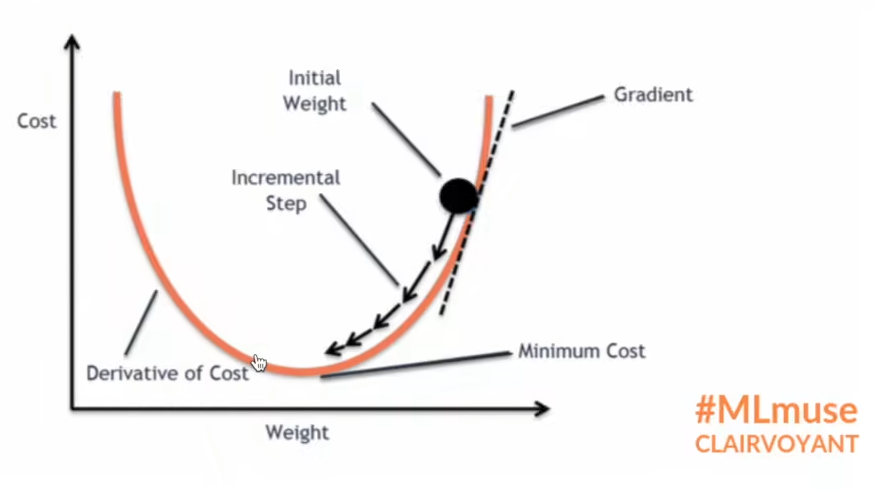

In [7]:
import torch
import torchvision
from torch import nn 
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64,drop_last=True)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()        
        self.model1 = Sequential(
            Conv2d(3,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,32,5,padding=2),
            MaxPool2d(2),
            Conv2d(32,64,5,padding=2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024,64),
            Linear(64,10)
        )
        
    def forward(self, x):
        x = self.model1(x)
        return x
    
loss = nn.CrossEntropyLoss() # 交叉熵    
tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    outputs = tudui(imgs)
    result_loss = loss(outputs, targets) # 计算实际输出与目标输出的差距
    result_loss.backward()  # 计算出来的 loss 值有 backward 方法属性，反向传播来计算每个节点的更新的参数。这里查看网络的属性 grad 梯度属性刚开始没有，反向传播计算出来后才有，后面优化器会利用梯度优化网络参数。      
    print("ok")

Files already downloaded and verified
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
